In [0]:
# spart imports
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [0]:
## get the spark session instantiate
spark = SparkSession.builder.appName("Asg2").getOrCreate()

In [0]:
# A.(2) Load the data
import urllib.request 
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz") 
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz") 
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903


In [0]:
# A.(3)
## load data from file file
path = "dbfs:/kdd/kddcup_data.gz"
rdd=spark.sparkContext.textFile(path, 4)
 # display 10 values
rdd.take(10)

Out[4]: ['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0.04,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11,79,1.00,0.00,0.09,0.04,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,8,89,1.00,0.00,0.12,0.04,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,8,99,1.00,0.00,0.12,0.05,0.00,0.00,0.00,0.00,normal.']

In [0]:
# check data structure and very the whole data structure is rdd
print(f" data structure: {type(rdd)}")
from pyspark.rdd import RDD
print(f"check the whole data tructure is rdd: {isinstance(rdd, RDD)}")

data structure: <class 'pyspark.rdd.RDD'>
check the whole data tructure is rdd: True

In [0]:
# A. (4)
# Split the data
sp_rdd=rdd.map(lambda x:x.split(','))
sp_rdd.take(2)

Out[6]: [['0',
 'tcp',
 'http',
 'SF',
 '181',
 '5450',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '8',
 '8',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '1.00',
 '0.00',
 '0.00',
 '9',
 '9',
 '1.00',
 '0.00',
 '0.11',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 'normal.'],
 ['0',
 'tcp',
 'http',
 'SF',
 '239',
 '486',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '8',
 '8',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '1.00',
 '0.00',
 '0.00',
 '19',
 '19',
 '1.00',
 '0.00',
 '0.05',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 'normal.']]

In [0]:
# get the columns of the data, split the column names into a list
# in the next step
columns_str='''duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
label: categorical'''

In [0]:
# split the column names string to list
df_column = [line.split(':')[0] for line in columns_str.splitlines()]
df_column

Out[11]: ['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

In [0]:
# Build dataframe based on the rdd 
df=sp_rdd.toDF(df_column)
df.show(1)

+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+
duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_rate|dst_host_count|dst_host_srv_count|dst_host_same_srv_rate|dst_host_diff_srv_rate|dst_host_same_src_port_rate|dst_host_srv_diff_host_rate|dst_host_serror_rate|dst_host_srv_serror_rate|dst_host_rerror_rate|dst_host_srv_rerror_rate| label|
+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+
 0| tcp| http| SF| 181| 5450| 0| 0| 0| 0| 0| 1| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 8| 8| 0.00| 0.00| 0.00| 0.00| 1.00| 0.00| 0.00| 9| 9| 1.00| 0.00| 0.11| 0.00| 0.00| 0.00| 0.00| 0.00|normal.|
+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+
only showing top 1 row

In [0]:
# Find the total number of features
print(f"number of columns: {len(df.columns)}")

number of columns: 42

In [0]:
# A.(5)
# list of desired columns
target_col = ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes', 'flag' , 'label']

In [0]:
# Create dataframe with selected columns
df2 = df.select(*target_col)
df2.show(10)

+--------+-------------+-------+---------+---------+----+-------+
duration|protocol_type|service|src_bytes|dst_bytes|flag| label|
+--------+-------------+-------+---------+---------+----+-------+
 0| tcp| http| 181| 5450| SF|normal.|
 0| tcp| http| 239| 486| SF|normal.|
 0| tcp| http| 235| 1337| SF|normal.|
 0| tcp| http| 219| 1337| SF|normal.|
 0| tcp| http| 217| 2032| SF|normal.|
 0| tcp| http| 217| 2032| SF|normal.|
 0| tcp| http| 212| 1940| SF|normal.|
 0| tcp| http| 159| 4087| SF|normal.|
 0| tcp| http| 210| 151| SF|normal.|
 0| tcp| http| 212| 786| SF|normal.|
+--------+-------------+-------+---------+---------+----+-------+
only showing top 10 rows

In [0]:
# print the schema of the dataframe
df2.printSchema()

root
-- duration: string (nullable = true)
-- protocol_type: string (nullable = true)
-- service: string (nullable = true)
-- src_bytes: string (nullable = true)
-- dst_bytes: string (nullable = true)
-- flag: string (nullable = true)
-- label: string (nullable = true)

In [0]:
# As shown in the schema tabel, the duration, src_bytes, and dst_bytes are string type
# We convert them back to double types
from pyspark.sql.functions import col
df3 = df2.withColumn("duration", df2["duration"].cast('double'))
df3 = df3.withColumn("src_bytes", df3["src_bytes"].cast('double'))
df3 = df3.withColumn("dst_bytes", df3["dst_bytes"].cast('double'))

# print the schema of the dataframe
df3.printSchema()

root
-- duration: double (nullable = true)
-- protocol_type: string (nullable = true)
-- service: string (nullable = true)
-- src_bytes: double (nullable = true)
-- dst_bytes: double (nullable = true)
-- flag: string (nullable = true)
-- label: string (nullable = true)

In [0]:
# Creat RDD with selected columns
rdd2 = df2.rdd
rdd2.take(10)

Out[17]: [Row(duration='0', protocol_type='tcp', service='http', src_bytes='181', dst_bytes='5450', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='239', dst_bytes='486', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='235', dst_bytes='1337', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='219', dst_bytes='1337', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='217', dst_bytes='2032', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='217', dst_bytes='2032', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='212', dst_bytes='1940', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='159', dst_bytes='4087', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='210', dst_bytes='151', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='212', dst_bytes='786', flag='SF', label='normal.')]

In [0]:
# A.(6)
# based on protocol_type
tab1 = df2.groupBy('protocol_type').agg(count('label').alias('num_connections')).sort('num_connections')
tab1.show()
# based on service
tab2 = df2.groupBy('service').agg(count('label').alias('num_connections')).sort('num_connections')
tab2.show()

+-------------+---------------+
protocol_type|num_connections|
+-------------+---------------+
 udp| 20354|
 tcp| 190065|
 icmp| 283602|
+-------------+---------------+

+-----------+---------------+
 service|num_connections|
+-----------+---------------+
 red_i| 1|
 pm_dump| 1|
 tftp_u| 1|
 tim_i| 7|
 X11| 11|
 urh_i| 14|
 IRC| 43|
 Z39_50| 92|
 netstat| 95|
 ctf| 97|
 kshell| 98|
 name| 98|
netbios_dgm| 99|
 http_443| 99|
 exec| 99|
 ldap| 101|
 pop_2| 101|
 link| 102|
 netbios_ns| 102|
 daytime| 103|
+-----------+---------------+
only showing top 20 rows

In [0]:
# plot the data in bar plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

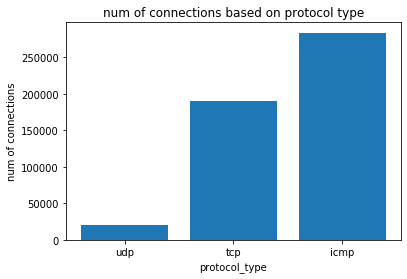

In [0]:
# For num_connections based on protocol type
# create pandas dataframe based on the result table
tab1_pd = tab1.toPandas()
# plot the bar graph
plt.bar(tab1_pd['protocol_type'], tab1_pd['num_connections'])
plt.xlabel("protocol_type")
plt.ylabel("num of connections")
plt.title("num of connections based on protocol type")

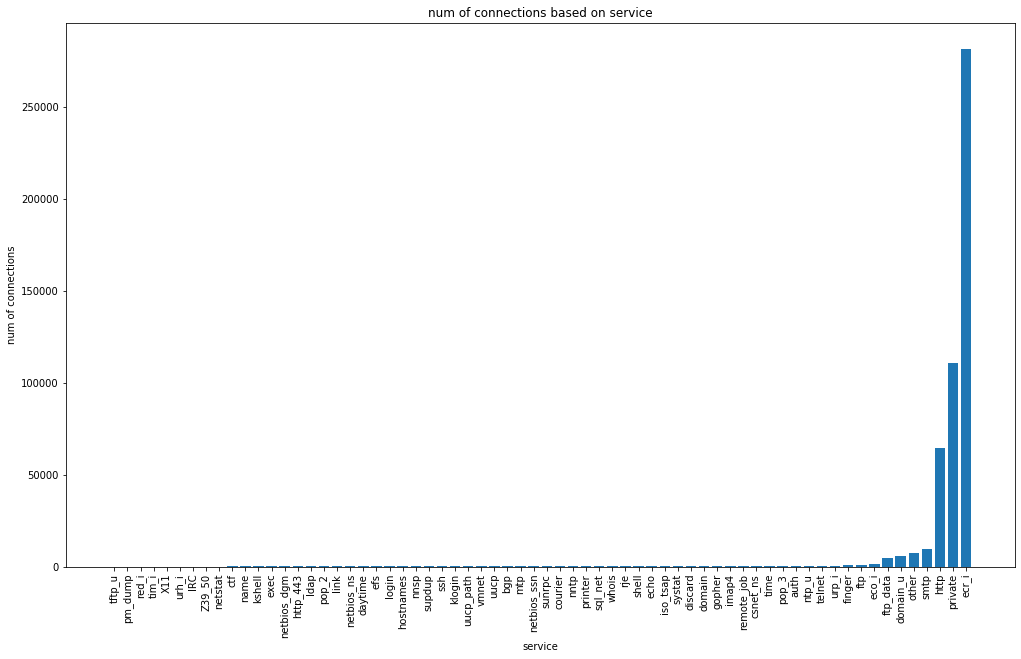

In [0]:
# For num_connections based on service 
# create pandas dataframe based on the result table
tab2_pd = tab2.toPandas()
# plot the bar graph
plt.figure(figsize=(17,10))
plt.bar(tab2_pd['service'], tab2_pd['num_connections'])
plt.xticks(rotation=90)
plt.xlabel("service")
plt.ylabel("num of connections")
plt.title("num of connections based on service")

In [0]:
# A.(7) Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

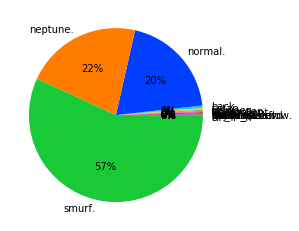

In [0]:
# A.(7) -1
# First lets have a look on the distribution of attacks and normals.
# From the pie chart, we can find that most of the attacks are from 'smurf'(57%)  and 'neptune'(22%)
# The sum of the rest kinds of attacks only make around 1.25% of the total attacks.
label_dist = df2.groupBy('label').agg(count('label').alias('counts')).sort('counts')
label_dist.show()
# plot a pie chart to better illustrate the data
colors = sns.color_palette('bright')
plt.pie(x=label_dist.select('counts').toPandas()['counts'],\
        labels = label_dist.select('label').toPandas()['label'],\
        colors = colors,autopct = '%0.0f%%')
plt.title("distribution of label")
plt.show()

In [0]:
# A.(7) -2
# src_bytes is the number of data bytes from source to destination 
# dst_bytes is the number of data bytes from destination to source 
# In the following plot, we analysis the relationship between the bytes of data transferred and the label.
# We first create the table of mean src_bytes and mean dst_bytes based on the categories of the label, combine
# them into one dataframe and melt.
# From the following plot, it is interesting to notice that the warezmaster has extremely abnormal average 
# number of bytes transferred from destination to source(around 4000000). Followed by multihop with around
# 250000 bytes. For src_bytes, we can find that portsweep, warezclient, and back all have a very large
# number of data bytes from source to destination. Besides, we can find that "normal" has a small number 
# of average dst_bytes and very few mean src_bytes. Consider the most common two attacks 'smurf'(71% of total attacks)  
# and 'neptune'(27.5% of total attacks), they both have very few mean dst_bytes as normal, but their mean src_bytes
# is far smaller than the one of "normal". This could be a good quality feature to distinguish the "normal" and 
# the common attacks 'smurf' and 'neptune' and other attacks with very small  src_bytes.

tab4 = df2.groupBy('label').agg(mean('src_bytes').alias('mean_src_bytes'),\
                                mean('dst_bytes').alias('mean_dst_bytes') ).sort(desc('mean_src_bytes'), desc('mean_dst_bytes'))
tab4_pd = tab4.toPandas()
tab4_pd_melt = pd.melt(tab4_pd,id_vars='label', var_name="type", value_name="bytes")

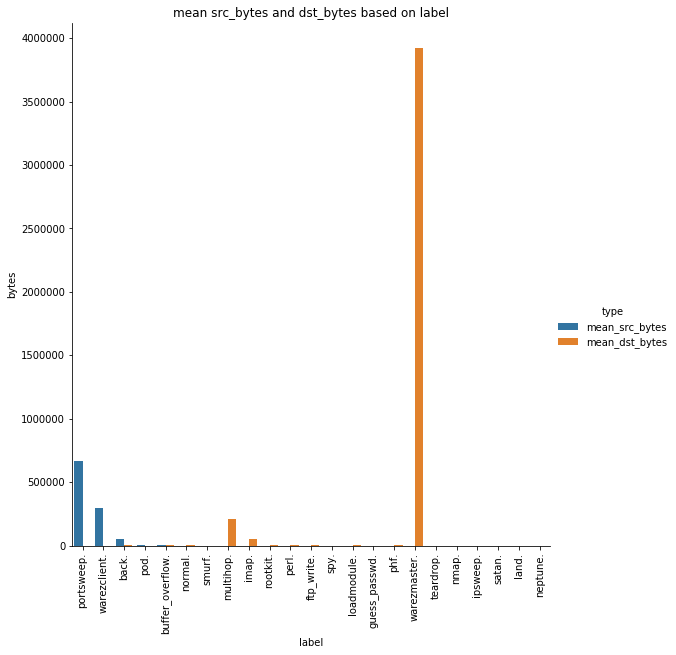

In [0]:
plt.figure(figsize=(17,10))
sns.factorplot(x='label', y='bytes', hue='type', data=tab4_pd_melt, kind='bar', height=8)
# labels and titles
plt.xticks(rotation=90)
plt.xlabel("label")
plt.ylabel("bytes")
plt.title("mean src_bytes and dst_bytes based on label")
# # plt.tight_layout()
plt.show()

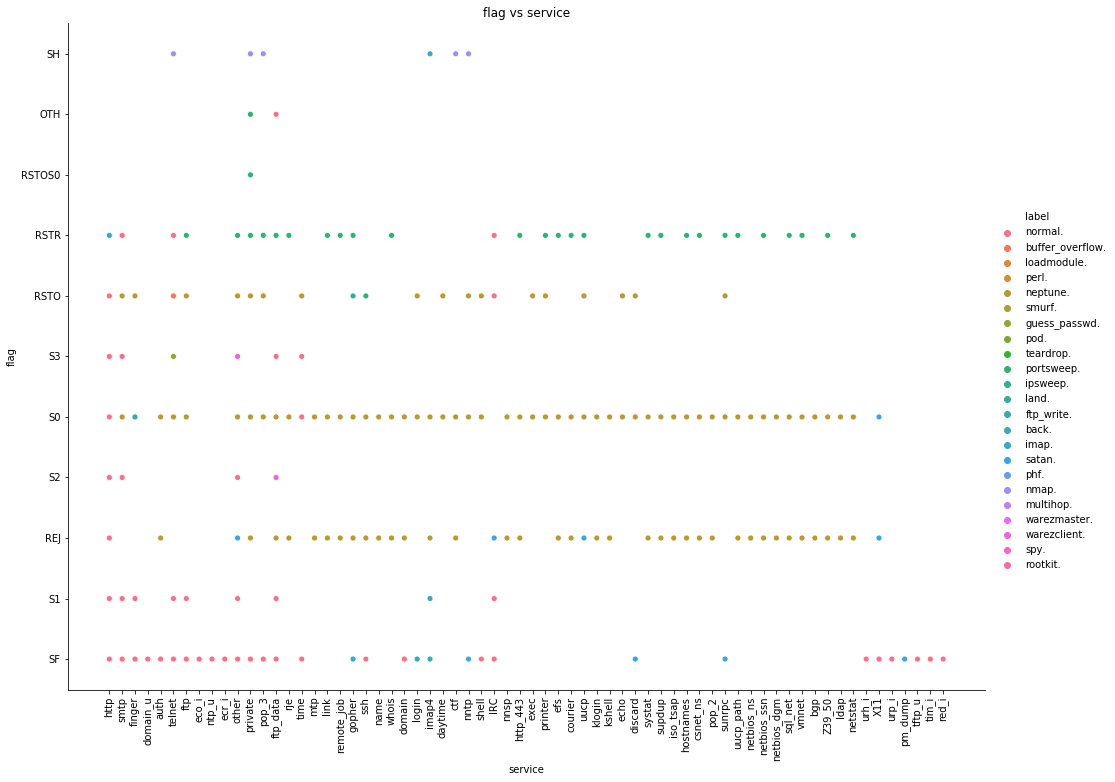

In [0]:
# A.(7) -3
# The following chart illustrates the label based on the ‘service’ and the ‘flag’.
# From the plot, we can find that when flag is S0 REJ, based on the current
# dataset, we can almost be sure that it is ‘neptune’ attack. And when flag is
# ‘RSTR’, there is a great chance that the label is “portsweep”. And on the bottom
# of the plot, we can find when flag is ‘SF’ and S1, for most case the label is
# ‘normal’. Some exceptions are when service is “imap4”, “discard”,”pm_dump”, and
# “sunrpc”. Overall, the variable ‘flag’ has great influence on the label.

plt.figure(figsize=(20,10))

sns.relplot(data=df2.toPandas(),\
            x="service",\
            y="flag",\
            hue="label",\
            kind='scatter',\
            aspect=1.4, height=10)

plt.xticks(rotation=90)

plt.title("flag vs service")
# plt.tight_layout()
plt.show()

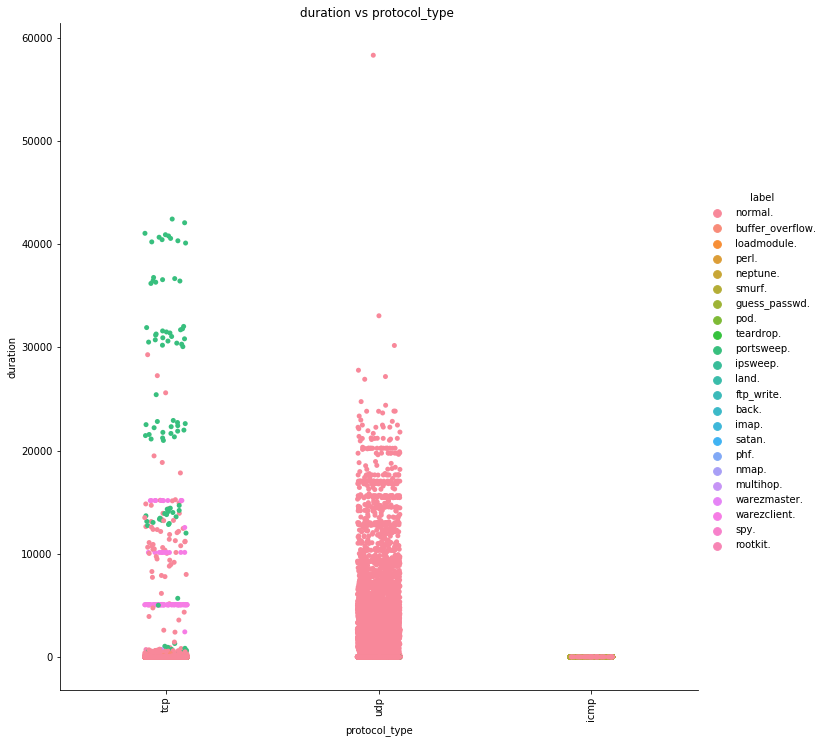

In [0]:
# A.(7)-4
# Based on the duration vs procotol_type plot, we can find when procotol_type is
# udp, most of the cases are normal. But when procotol_type is tcp, the cases with
# duration greater than 20000 are mostly portsweep attacks. And in the tcp bar, we
# can identify warezclient attacks at 3 certain duration levels. When
# procotol_type is icmp, most points are overlapping together, hence it is hard to
# recognize any pattern.

plt.figure(figsize=(20,10))

sns.catplot(data=df3.toPandas(),\
            x="protocol_type",\
            y="duration",\
            hue="label",\
            height=10)

plt.xticks(rotation=90)

plt.title("duration vs protocol_type ")
# plt.tight_layout()
plt.show()

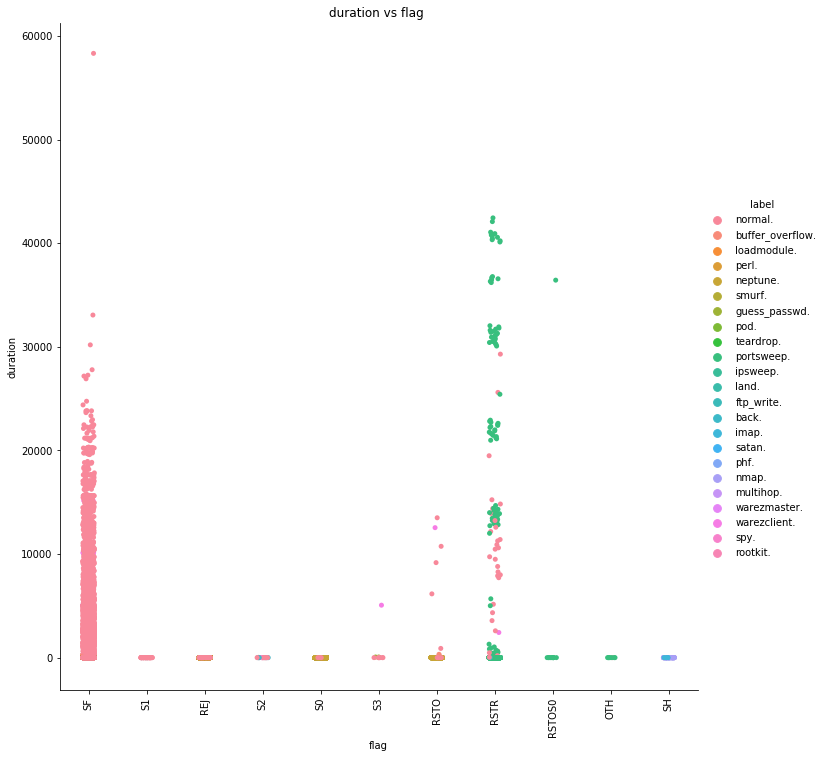

In [0]:
# A.(7)-5
# Based on the duration vs flag plot, we can find that when flag is SF, the cases
# are normal regardless of the duration value. And when flag is RSTR, we can
# identify 5 clusters of portsweep attacks. In the other categories of flag, most
# points are overlapping together, hence it is hard to recognize any pattern.
# set plot size
plt.figure(figsize=(20,10))
# create plot
sns.catplot(data=df3.toPandas(),\
            x="flag",\
            y="duration",\
            hue="label",\
            height=10)
# rotate ticks
plt.xticks(rotation=90)
# set title
plt.title("duration vs flag ")
# plt.tight_layout()
plt.show()

In [0]:
# A.(7)-6
# Based on the plot (3) flag vs. service, we identified that when flag is S0, most of the cases are Neptune attacks. 
# From the following bar chart, we can find that there are certain number of S0 connections, in which a large number
# of them are Neptune attacks.
# based on protocol_type
tab3 = df2.groupBy('flag').agg(count('label').alias('num_connections')).sort('num_connections')
# tab3.show()

# For num_connections based on service 
# create pandas dataframe based on the result table
tab3_pd = tab3.toPandas()

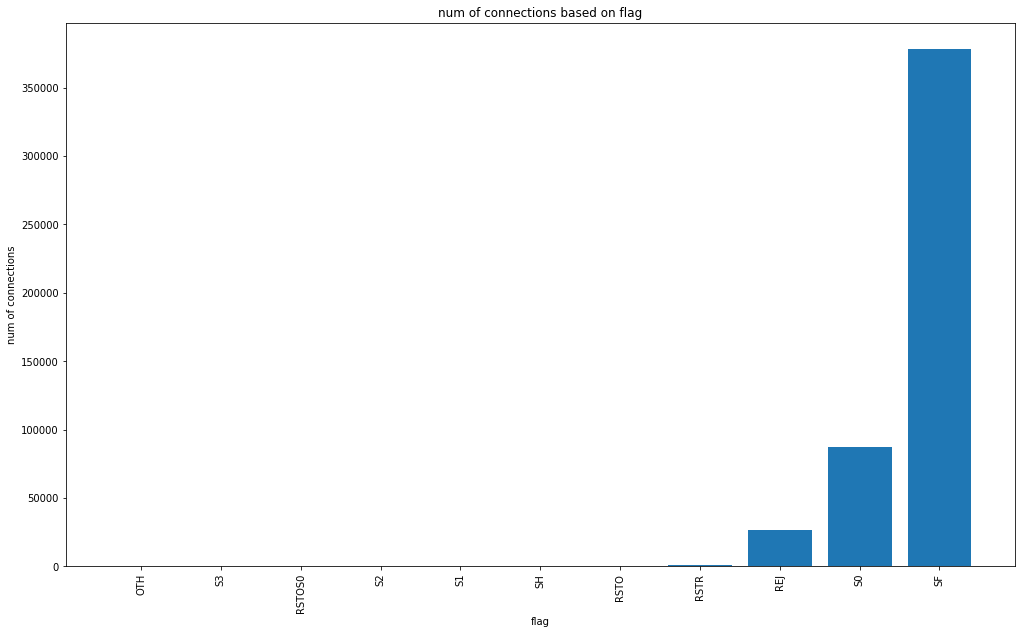

In [0]:
# plot the bar graph
plt.figure(figsize=(17,10))
plt.bar(tab3_pd['flag'], tab3_pd['num_connections'])
plt.xticks(rotation=90)
plt.xlabel("flag")
plt.ylabel("num of connections")
plt.title("num of connections based on flag")

In [0]:
# A.(8)
# prepare data, change the label where label != ‘normal’ to attacks
# For the purpose of building model, we can transform the label to 
# numerical data. We use 0 to represent normal, and 1 to represent attack

# selected variables
# duration:double
# protocol_type:string
# src_bytes:double
# dst_bytes:double
# flag:string
# label:integer
all_cols=pd.Series(['duration','protocol_type','src_bytes','dst_bytes','flag','label'])

df4 = df3.withColumn("label", \
              when(df3["label"] != "normal.", 1).otherwise(0))

# Drop service
df4=df4.drop("service")

In [0]:
df4.groupBy('label').agg(count('label').alias('num_connections')).sort('num_connections').show()

+-----+---------------+
label|num_connections|
+-----+---------------+
 0| 97278|
 1| 396743|
+-----+---------------+

In [0]:
# split the data
(train,test) = df4.randomSplit([0.8,0.2])

In [0]:
# One hot encoding. This function will take the whole dataframe, training dataset
# and the test dataset and the target column names as input.
# The target column names should be the col names of the
# category variables. The function will remove the existing target columns and
# replace with one hot encoding columns.
# Since there are some types that only exist in the training dataset
# To get a complete list of types, we use the unique type of each 
# categories of the full dataset to construct dummy variables for 
# test and training dataset
# param: df, target_cols -> col names of desired categorical variables
# 
def get_OHE(df,train, test, target_cols):
    # param: df, target_cols
    #  get list of unselected columns
    existing_cols = pd.Series(df.columns)
    num_cols = existing_cols[~existing_cols.isin(target_cols)]
#     print(num_cols)
    # store expressions in a list
    expr_list=[]
    for col_name in target_cols:
        tmp_col_unique_list = df.select(col_name).distinct().rdd.flatMap(lambda x: x).collect()
        tmp_col_expr = [when(col(col_name) == cat, 1).otherwise(0).alias(col_name+"_"+ cat) for cat in tmp_col_unique_list]
        expr_list = expr_list + tmp_col_expr
    # # assign numerical features to temp DataFrame

    tmp_train_df = train.select(*num_cols , *expr_list)
    tmp_test_df = test.select(*num_cols , *expr_list)
    # return the modified df with one hot encodding
    return tmp_train_df,tmp_test_df

In [0]:
# This function takes train dataset, test dataset and a list of target columns as input.
# A standardscaler will be fitted on the train dataset with selected columns. Then the 
# scaler will be used to transform both training dataset and test dataset, and return
# the standardized training dataset and test dataset
# The training and testing dataset has to be in the same form. 
# The target variables must be numerical variables and have been converted to numerical 
#  form.
def get_std_df(train,test,target_col):
    # all vairables
    all_cols = pd.Series(train.columns)
    # assemble values into vector, then apply StandardScaler on the vector by pipeline
    vecAmr =  VectorAssembler(inputCols=target_cols,\
                              outputCol="features",\
                              handleInvalid='skip')
    std_sc = StandardScaler(inputCol="features",\
                            outputCol="stdFeatures")
    pipeline_std = Pipeline(stages=[vecAmr,std_sc])
    # fit the scalar with train data and transform the train and test data with the
    # scaler 
    train_std_scaler = pipeline_std.fit(train)
    train_std = train_std_scaler.transform(train)
    test_std = train_std_scaler.transform(test)
    # return the vector formed data back to dataframe
    # For the training dataset
    train_std_array = train_std.withColumn("stdFeatures",\
                                           vector_to_array("stdFeatures"))
    train_std_df= train_std_array.select([col('stdFeatures')[i].alias(target_cols[i])\
                                          for i in range(len(target_cols))])
    # For the test dataset
    test_std_array = test_std.withColumn("stdFeatures",\
                                         vector_to_array("stdFeatures"))
    test_std_df= test_std_array.select([col('stdFeatures')[i].alias(target_cols[i])\
                                        for i in range(len(target_cols))])
    
    # Add the removed categorical variables back to the DataFrame
    #For training dataset
    train_final_pd = pd.concat([train_std_df.toPandas(),\
                                train.select(*all_cols[~all_cols.isin(target_col)]).toPandas()],\
                               axis=1)
    train_final=spark.createDataFrame(train_final_pd)
    
    # For test dataset
    test_final_pd = pd.concat([test_std_df.toPandas(),\
                               test.select(*all_cols[~all_cols.isin(target_col)]).toPandas()],\
                             axis=1)
    test_final=spark.createDataFrame(test_final_pd)
    
    #return the result
    return train_final, test_final



In [0]:
# We would not standardize categorical variables as they will be transformed by 
#  one hot encoding

# Target variables: duration, src_bytes, dst_bytes
# protocol_type:string
# flag:string

target_std_cols = ['duration', 'src_bytes', 'dst_bytes']
train_std, test_std = get_std_df(train,test,target_std_cols)

In [0]:
# Now we apply one hot encoding on all the categorical variables to transform them 
# to numerical format.

target_cat_cols = ["protocol_type", "flag"]
train_std_num,test_std_num = get_OHE(df=df4,\
                                     train = train_std,\
                                     test = test_std, \
                                     target_cols=target_cat_cols)
# train_std_num = get_OHE(train_std,target_cat_cols)
# test_std_num = get_OHE(test_std,target_cat_cols)

In [0]:
test_std_num.columns

Out[436]: ['duration',
 'src_bytes',
 'dst_bytes',
 'label',
 'protocol_type_tcp',
 'protocol_type_udp',
 'protocol_type_icmp',
 'flag_RSTOS0',
 'flag_S3',
 'flag_SF',
 'flag_S0',
 'flag_OTH',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTR',
 'flag_SH',
 'flag_S2',
 'flag_S1']

In [0]:
train_std_num.columns

Out[435]: ['duration',
 'src_bytes',
 'dst_bytes',
 'label',
 'protocol_type_tcp',
 'protocol_type_udp',
 'protocol_type_icmp',
 'flag_RSTOS0',
 'flag_S3',
 'flag_SF',
 'flag_S0',
 'flag_OTH',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTR',
 'flag_SH',
 'flag_S2',
 'flag_S1']

In [0]:
train_std_num.show(1)

+--------+--------------------+---------+-----+-----------------+-----------------+------------------+-----------+-------+-------+-------+--------+--------+---------+---------+-------+-------+-------+
duration| src_bytes|dst_bytes|label|protocol_type_tcp|protocol_type_udp|protocol_type_icmp|flag_RSTOS0|flag_S3|flag_SF|flag_S0|flag_OTH|flag_REJ|flag_RSTO|flag_RSTR|flag_SH|flag_S2|flag_S1|
+--------+--------------------+---------+-----+-----------------+-----------------+------------------+-----------+-------+-------+-------+--------+--------+---------+---------+-------+-------+-------+
 0.0|1.434803586748326...| 0.0| 1| 0| 0| 1| 0| 0| 1| 0| 0| 0| 0| 0| 0| 0| 0|
+--------+--------------------+---------+-----+-----------------+-----------------+------------------+-----------+-------+-------+-------+--------+--------+---------+---------+-------+-------+-------+
only showing top 1 row

In [0]:
test_std_num.show(1)

+--------+--------------------+---------+-----+------------------+-----------------+-----------------+-------+--------+-------+---------+---------+-------+-------+-------+-----------+
duration| src_bytes|dst_bytes|label|protocol_type_icmp|protocol_type_tcp|protocol_type_udp|flag_SF|flag_REJ|flag_S0|flag_RSTO|flag_RSTR|flag_SH|flag_S2|flag_S1|flag_RSTOS0|
+--------+--------------------+---------+-----+------------------+-----------------+-----------------+-------+--------+-------+---------+---------+-------+-------+-------+-----------+
 0.0|1.434803586748326...| 0.0| 1| 1| 0| 0| 1| 0| 0| 0| 0| 0| 0| 0| 0|
+--------+--------------------+---------+-----+------------------+-----------------+-----------------+-------+--------+-------+---------+---------+-------+-------+-------+-----------+
only showing top 1 row

In [0]:
from pyspark.ml.classification import LinearSVC


In [0]:
# Transform the data into the format that SVC requires.
# The dataset includes two columns: label, features
all_cols_dummy = pd.Series(train_std_num.columns)
feature_cols=all_cols_dummy.drop(all_cols_dummy.index[all_cols_dummy == "label"])
feature_cols

Out[438]: 0 duration
1 src_bytes
2 dst_bytes
4 protocol_type_tcp
5 protocol_type_udp
6 protocol_type_icmp
7 flag_RSTOS0
8 flag_S3
9 flag_SF
10 flag_S0
11 flag_OTH
12 flag_REJ
13 flag_RSTO
14 flag_RSTR
15 flag_SH
16 flag_S2
17 flag_S1
dtype: object

In [0]:
feature_cols.values

Out[439]: array(['duration', 'src_bytes', 'dst_bytes', 'protocol_type_tcp',
 'protocol_type_udp', 'protocol_type_icmp', 'flag_RSTOS0',
 'flag_S3', 'flag_SF', 'flag_S0', 'flag_OTH', 'flag_REJ',
 'flag_RSTO', 'flag_RSTR', 'flag_SH', 'flag_S2', 'flag_S1'],
 dtype=object)

In [0]:
# Assemble the features, first create the assembler
svm_va = VectorAssembler(inputCols = feature_cols.values, outputCol='features')

# For the training dataset
train_std_num_svm = svm_va.transform(train_std_num)
train_std_num_svm = train_std_num_svm.select(['features', 'label'])
train_std_num_svm.show(1)

+--------------------+-----+
 features|label|
+--------------------+-----+
(17,[1,5,8],[1.43...| 1|
+--------------------+-----+
only showing top 1 row

In [0]:
# For the test dataset
test_std_num_svm = svm_va.transform(test_std_num)
test_std_num_svm = test_std_num_svm.select(['features', 'label'])
test_std_num_svm.show(1)

+--------------------+-----+
 features|label|
+--------------------+-----+
(17,[1,5,8],[1.43...| 1|
+--------------------+-----+
only showing top 1 row

In [0]:
lsvc = LinearSVC(labelCol="label",maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(train_std_num_svm)
# training result
train_pred = lsvcModel.transform(train_std_num_svm)
# Test the model performance on the test dataset
test_pred = lsvcModel.transform(test_std_num_svm)


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix

In [0]:
# display the test result
test_pred.show(5)

+--------------------+-----+--------------------+----------+
 features|label| rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
(17,[1,5,8],[1.43...| 1|[-0.9779955081929...| 1.0|
(17,[1,5,8],[1.43...| 1|[-0.9779955081929...| 1.0|
(17,[1,5,8],[1.43...| 1|[-0.9779955081929...| 1.0|
(17,[1,5,8],[1.43...| 1|[-0.9779955081929...| 1.0|
(17,[1,5,8],[1.43...| 1|[-0.9779955081929...| 1.0|
+--------------------+-----+--------------------+----------+
only showing top 5 rows

In [0]:
# From the train score (0.84) and test score (0.839), we can find that they are
# very close, hence there is no over fitting. But there could be potential under
# fitting of the data, as we only selected six strong predictors based on the
# plots in part (7). And the regression parameter of the model is set to 0.1. To
# improve the performance, we could try to include more variables to the dataset
# to reduce underfitting. And we could apply data visualization on more variables
# from the data frame and perform the Spark-Chi-SVM model for feature selection.
# From the confusion matrix, it is interesting to notice that the number of true
# positives and true negatives are both relatively high. And the false negative is
# very small, which gives a recall of 0.94. The number of false positives is also
# relatively large, which affects the precision rate. At this case, we would have
# a low f1 score. We could try to modify the prediction threshold to improve the
# f1 score. Overall, the model has a acceptable performance.

# evaluate the result
evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
train_acc = evaluator.evaluate(train_pred)
test_acc = evaluator.evaluate(test_pred)
print(f"The train accuracy is {np.around(train_acc,3)}\nThe test accuracy is {np.around(test_acc,3)}")

The train accuracy is 0.84
The test accuracy is 0.839

In [0]:
# Get the confusion matrix
confusion_matrix(test_pred.select("label").collect(),\
                test_pred.select("prediction").collect())

Out[455]: array([[ 3871, 15651],
 [ 240, 78904]])